<a href="https://colab.research.google.com/github/LegendSeyi/Support-Vector-Machine-ML-project/blob/main/Group_G_SVM_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title of Project:** Spam Message Detection Using Support Vector Machine

**Algorithm:** Support Vector Machine

**Description:** Classify SMS messages as spam or non-spam.

**Tasks:**
- Preprocess text
- vectorize features
- train SVM
- evaluate performance.

**Evaluation Metrics:**
* Precision
* Recall
* F1-Score

**Required Explanation:**
*Discuss patterns associated with spam messages and the importance of precision.*

We now import the important libraries needed for this project

In [ ]:
import pandas as pd     # from dataframe
import numpy as np     # An array object of arbitrary homogeneous items and Fast mathematical operations over arrays
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import re #regular expression fir pattern based text cleaning

In [ ]:
# configuring the dataset
# calling the url link where the dataset is stored.
# pd.set_option to enable us to see the maximum column in the dataset

url = "https://github.com/LegendSeyi/Dataset/raw/refs/heads/main/spam.csv"
pd.set_option("display.max_columns", None)

data  = pd.read_csv(url, encoding = "latin-1")

In [ ]:
#Checking the first 10 rows of the dataset
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

We can observe that the dataset has 5572 rows and 5 columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


V1 and V2 columns has no null values. but the unnamed columns 2,3,4 has nun values. The data types appears to be objects (letters/ strings)

## EDA (Exploratory Data Analysis)

From the observation, the dataset contains unnecessary columns with alot of NaN. These columns are not required for our classification. Only: v1 (message label) v2 (SMS content)are retained. These columns are renamed to label and message for clarity.

In [ ]:
# Keep only label and message columns
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [ ]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#checking uniques of value in column
print(f'unique values in label are {data['label'].unique()}')
data['label'].nunique()

unique values in label are ['ham' 'spam']


2

Checking the unique values of the column "label". We have just two unique values

In [ ]:
print(f'Ham: {data.loc[data['label'] == 'ham'].count()}')

print(f'Spam: {data.loc[data['label'] == 'spam'].count()}')

Ham: label      4825
message    4825
dtype: int64
Spam: label      747
message    747
dtype: int64


From the dataset, the number of Ham messages are 4825 mesasages.... the number of Spam messages are 747 mesasages....

In [ ]:
data['message_length'] = data['message'].apply(len)

data.groupby('label')['message_length'].mean()


,message_length
label,
ham,71.023627
spam,138.866131


Spam massages tend to be longer than non spam messages

## TEXT PREPROCESSING

In [ ]:
data['message'].head()

,message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk #Natural Language Toolkit
from nltk.corpus import stopwords #imports a list of common words
from nltk.stem import PorterStemmer #an algorithm used to reduce words to their root form.

This imports NLTK (Natural Language Toolkit), a Python library used for Natural Language Processing tasks like text cleaning, tokenization, stemming, and stop-word removal.

#### Using Stemming for preocessing of Text

In [ ]:
# Download required NLTK data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [ ]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [ ]:
# Apply preprocessing
data['cleaned_message'] = data['message'].apply(preprocess_text)

In [ ]:
# checking a message and how it is not formatted or transformed
data['cleaned_message'][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [ ]:
# comparing the message to the old/ inital text
data['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

Due to the informal and slang-heavy nature of SMS messages, stemming was excluded to preserve contextual meaning and improve classification performance.

Stemming is the process of reducing words to their base or root form by removing endings.

It helps the computer treat similar words as the same word.

Why we used stemming
* Reduces the number of unique words

* Helps the model learn patterns faster

* Improves classification performance

Stemming was applied to reduce vocabulary size and improve learning efficiency.

we can still not use it, to preserve the original meaning of the informal SMS words

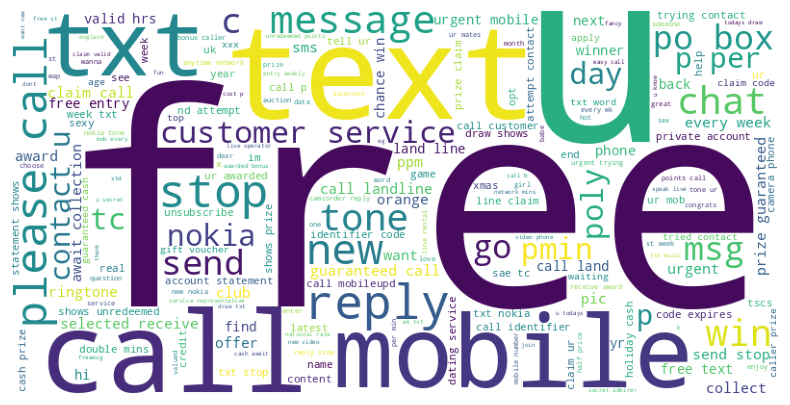

In [ ]:
# Wordcloud for spam messages
from wordcloud import WordCloud


spam_text = " ".join(
    data[data['label'] == 'spam']['cleaned_message']
)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(spam_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Above is the wordcloud for SPAM MESSAGES..

In [ ]:
data['label'].value_counts()

,count
label,
ham,4825
spam,747


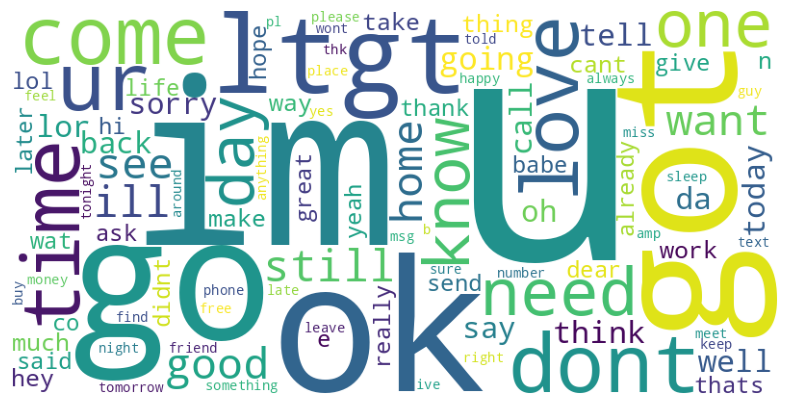

In [ ]:
# WORD CLOUD FOR HAM MESSAGES
ham_text = " ".join(
    data[data['label'] == 'ham']['cleaned_message']
)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100
).generate(ham_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Above is the wordcloud for HAM MESSAGES..